In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import PolynomialFeatures
from joblib import dump, load
from sklearn.preprocessing import MinMaxScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_excel('/content/drive/MyDrive/BTL_KPDLL_7/Real_estate_valuation_data_set.xlsx')
df

No  X1 transaction date  X2 house age  \
0      1          2012.916667          32.0   
1      2          2012.916667          19.5   
2      3          2013.583333          13.3   
3      4          2013.500000          13.3   
4      5          2012.833333           5.0   
..   ...                  ...           ...   
409  410          2013.000000          13.7   
410  411          2012.666667           5.6   
411  412          2013.250000          18.8   
412  413          2013.000000           8.1   
413  414          2013.500000           6.5   

     X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                  84.87882                               10   
1                                 306.59470                                9   
2                                 561.98450                                5   
3                                 561.98450                                5   
4                                 390.56840                                5   
..                                      ...                              ...   
409                              4082.01500                                0   
410                                90.45606                                9   
411                               390.96960                                7   
412                               104.81010                                5   
413                                90.45606                                9   

     X5 latitude  X6 longitude  Y house price of unit area  
0       24.98298     121.54024                        37.9  
1       24.98034     121.53951                        42.2  
2       24.98746     121.54391                        47.3  
3       24.98746     121.54391                        54.8  
4       24.97937     121.54245                        43.1  
..           ...           ...                         ...  
409     24.94155     121.50381                        15.4  
410     24.97433     121.54310                        50.0  
411     24.97923     121.53986                        40.6  
412     24.96674     121.54067                        52.5  
413     24.97433     121.54310                        63.9  

[414 rows x 8 columns]

# Check out the data

In [ ]:
df.head()

No  X1 transaction date  X2 house age  \
0   1          2012.916667          32.0   
1   2          2012.916667          19.5   
2   3          2013.583333          13.3   
3   4          2013.500000          13.3   
4   5          2012.833333           5.0   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                84.87882                               10   
1                               306.59470                                9   
2                               561.98450                                5   
3                               561.98450                                5   
4                               390.56840                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391                        54.8  
4     24.97937     121.54245                        43.1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [ ]:
df.dtypes

No                                          int64
X1 transaction date                       float64
X2 house age                              float64
X3 distance to the nearest MRT station    float64
X4 number of convenience stores             int64
X5 latitude                               float64
X6 longitude                              float64
Y house price of unit area                float64
dtype: object

In [ ]:
df.shape

(414, 8)

In [ ]:
df.describe()

No  X1 transaction date  X2 house age  \
count  414.000000           414.000000    414.000000   
mean   207.500000          2013.148953     17.712560   
std    119.655756             0.281995     11.392485   
min      1.000000          2012.666667      0.000000   
25%    104.250000          2012.916667      9.025000   
50%    207.500000          2013.166667     16.100000   
75%    310.750000          2013.416667     28.150000   
max    414.000000          2013.583333     43.800000   

       X3 distance to the nearest MRT station  \
count                              414.000000   
mean                              1083.885689   
std                               1262.109595   
min                                 23.382840   
25%                                289.324800   
50%                                492.231300   
75%                               1454.279000   
max                               6488.021000   

       X4 number of convenience stores  X5 latitude  X6 longitude  \
count                       414.000000   414.000000    414.000000   
mean                          4.094203    24.969030    121.533361   
std                           2.945562     0.012410      0.015347   
min                           0.000000    24.932070    121.473530   
25%                           1.000000    24.963000    121.528085   
50%                           4.000000    24.971100    121.538630   
75%                           6.000000    24.977455    121.543305   
max                          10.000000    25.014590    121.566270   

       Y house price of unit area  
count                  414.000000  
mean                    37.980193  
std                     13.606488  
min                      7.600000  
25%                     27.700000  
50%                     38.450000  
75%                     46.600000  
max                    117.500000

In [ ]:
# T√¨m c√°c gi√° tr·ªã nh√† b·ªã √¢m
negative_price_indices = df[df['Y house price of unit area'] < 0].index
# In ra c√°c gi√° tr·ªã b·ªã √¢m
print("C√°c gi√° tr·ªã nh√† b·ªã √¢m:")
print(df.loc[negative_price_indices, ['Y house price of unit area']])

C√°c gi√° tr·ªã nh√† b·ªã √¢m:
Empty DataFrame
Columns: [Y house price of unit area]
Index: []


Kh√¥ng c√≥ gi√° tr·ªã √¢m n√†o ·ªü c·ªôt 'Y house price of unit area'

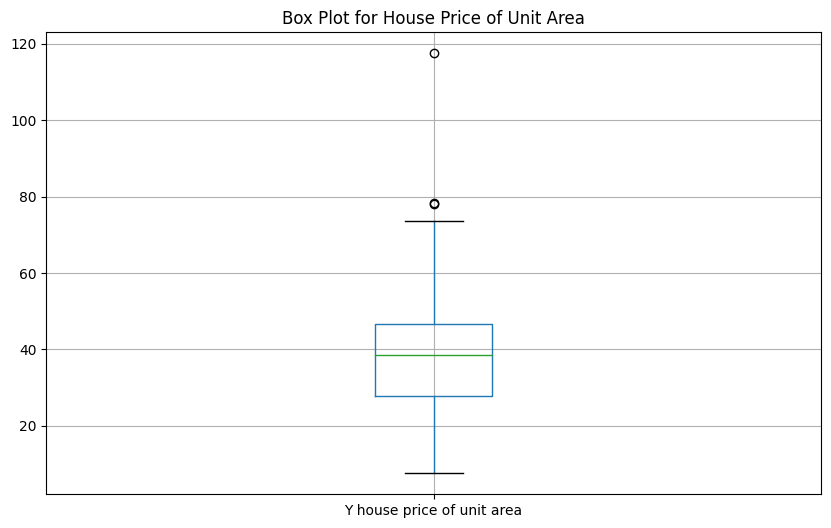

C√°c gi√° tr·ªã ngo·∫°i lai:
220     78.3
270    117.5
312     78.0
Name: Y house price of unit area, dtype: float64


In [ ]:
#T·∫°o Box Plot ƒë·ªÉ tr·ª±c quan h√≥a c√°c gi√° tr·ªã ngo·∫°i lai
plt.figure(figsize=(10, 6))
df.boxplot(column=['Y house price of unit area'])
plt.title('Box Plot for House Price of Unit Area')
plt.show()

# X√°c ƒë·ªãnh c√°c gi√° tr·ªã ngo·∫°i lai s·ª≠ d·ª•ng ph·∫°m vi interquartile (IQR)
def find_outliers_IQR(df):
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR  #Vi·ªác s·ª≠ d·ª•ng h·ªá s·ªë 1.5 l√† m·ªôt ti√™u chu·∫©n ph·ªï bi·∫øn trong vi·ªác x√°c ƒë·ªãnh c√°c gi√° tr·ªã ngo·∫°i lai.
    upper_bound = Q3 + 1.5 * IQR
    return df[(df < lower_bound) | (df > upper_bound)]

outliers = find_outliers_IQR(df['Y house price of unit area'])
print("C√°c gi√° tr·ªã ngo·∫°i lai:")
print(outliers)


In [ ]:
# Thay th·∫ø c√°c gi√° tr·ªã ngo·∫°i lai b·∫±ng gi√° tr·ªã trung b√¨nh c·ªßa c·ªôt
mean_value = df['Y house price of unit area'].mean()
df.loc[outliers.index, 'Y house price of unit area'] = mean_value

In [ ]:
# Chu·∫©n h√≥a d·ªØ li·ªáu
# Min-Max Scaling
scaler = MinMaxScaler()
df[['X1 transaction date',	'X2 house age',	'X3 distance to the nearest MRT station']] = scaler.fit_transform(df[
                                                                                                ['X1 transaction date',	'X2 house age',	'X3 distance to the nearest MRT station']])

**Chu·∫©n H√≥a D·ªØ Li·ªáu:** ƒê·∫ßu ti√™n, b·∫°n chu·∫©n h√≥a c√°c bi·∫øn ƒë·ªÉ ch√∫ng c√≥ c√πng thang ƒëo, ƒëi·ªÅu n√†y s·∫Ω gi√∫p m√¥ h√¨nh h·ªçc nhanh h∆°n v√† tr√°nh vi·ªác c√°c bi·∫øn l·ªõn chi ph·ªëi m√¥ h√¨nh.
**Bi·∫øn ƒê·ªïi Kh√¥ng Tuy·∫øn T√≠nh:** Ti·∫øp theo, nh·∫≠n th·∫•y r·∫±ng gi√° nh√† ph√¢n ph·ªëi l·ªách ph·∫£i. B·∫°n √°p d·ª•ng bi·∫øn ƒë·ªïi logarit ƒë·ªÉ l√†m gi·∫£m ƒë·ªô l·ªách v√† l√†m cho d·ªØ li·ªáu ph√¢n ph·ªëi g·∫ßn chu·∫©n h∆°n.

#### Ki·ªÉm tra v√† lo·∫°i b·ªè ƒëa c·ªông tuy·∫øn

In [ ]:
# Ch·ªçn c√°c bi·∫øn ƒë·ªôc l·∫≠p ƒë·ªÉ ki·ªÉm tra ƒëa c·ªông tuy·∫øn
X = df[['X1 transaction date','X2 house age','X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]

# T√≠nh to√°n VIF cho t·ª´ng bi·∫øn s·ªë
vif_df = pd.DataFrame()
vif_df['feature'] = X.columns
vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print("VIF c·ªßa c√°c bi·∫øn s·ªë:")
print(vif_df)
# M·ªôt b·∫£ng hi·ªÉn th·ªã VIF (h·ªá s·ªë ph√≥ng ƒë·∫°i ph∆∞∆°ng sai) cho t·ª´ng bi·∫øn s·ªë, gi√∫p x√°c ƒë·ªãnh m·ª©c ƒë·ªô ƒëa c·ªông tuy·∫øn gi·ªØa c√°c bi·∫øn.

VIF c·ªßa c√°c bi·∫øn s·ªë:
                                  feature           VIF
0                     X1 transaction date  3.982447e+00
1                            X2 house age  3.470895e+00
2  X3 distance to the nearest MRT station  2.946550e+00
3         X4 number of convenience stores  4.742453e+00
4                             X5 latitude  5.946057e+06
5                            X6 longitude  5.945190e+06


<Axes: >

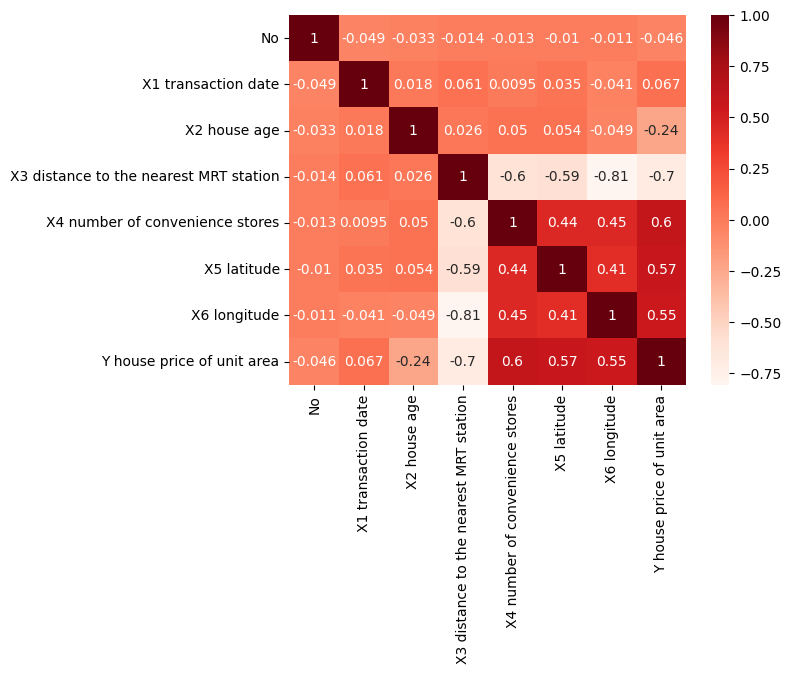

In [ ]:
# Ki·ªÉm tra ma tr·∫≠n t∆∞∆°ng quan
sns.heatmap(df.corr(), annot=True,cmap='Reds')

#M·ªôt ma tr·∫≠n hi·ªÉn th·ªã h·ªá s·ªë t∆∞∆°ng quan gi·ªØa c√°c bi·∫øn, gi√∫p ki·ªÉm tra m·ªëi quan h·ªá t∆∞∆°ng quan gi·ªØa c√°c bi·∫øn ƒë·ªôc l·∫≠p.

In [ ]:
# Ki·ªÉm tra l·∫°i d·ªØ li·ªáu sau khi bi·∫øn ƒë·ªïi
df.head()

No  X1 transaction date  X2 house age  \
0   1             0.272727      0.730594   
1   2             0.272727      0.445205   
2   3             1.000000      0.303653   
3   4             0.909091      0.303653   
4   5             0.181818      0.114155   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                0.009513                               10   
1                                0.043809                                9   
2                                0.083315                                5   
3                                0.083315                                5   
4                                0.056799                                5   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391                        54.8  
4     24.97937     121.54245                        43.1

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


# EDA

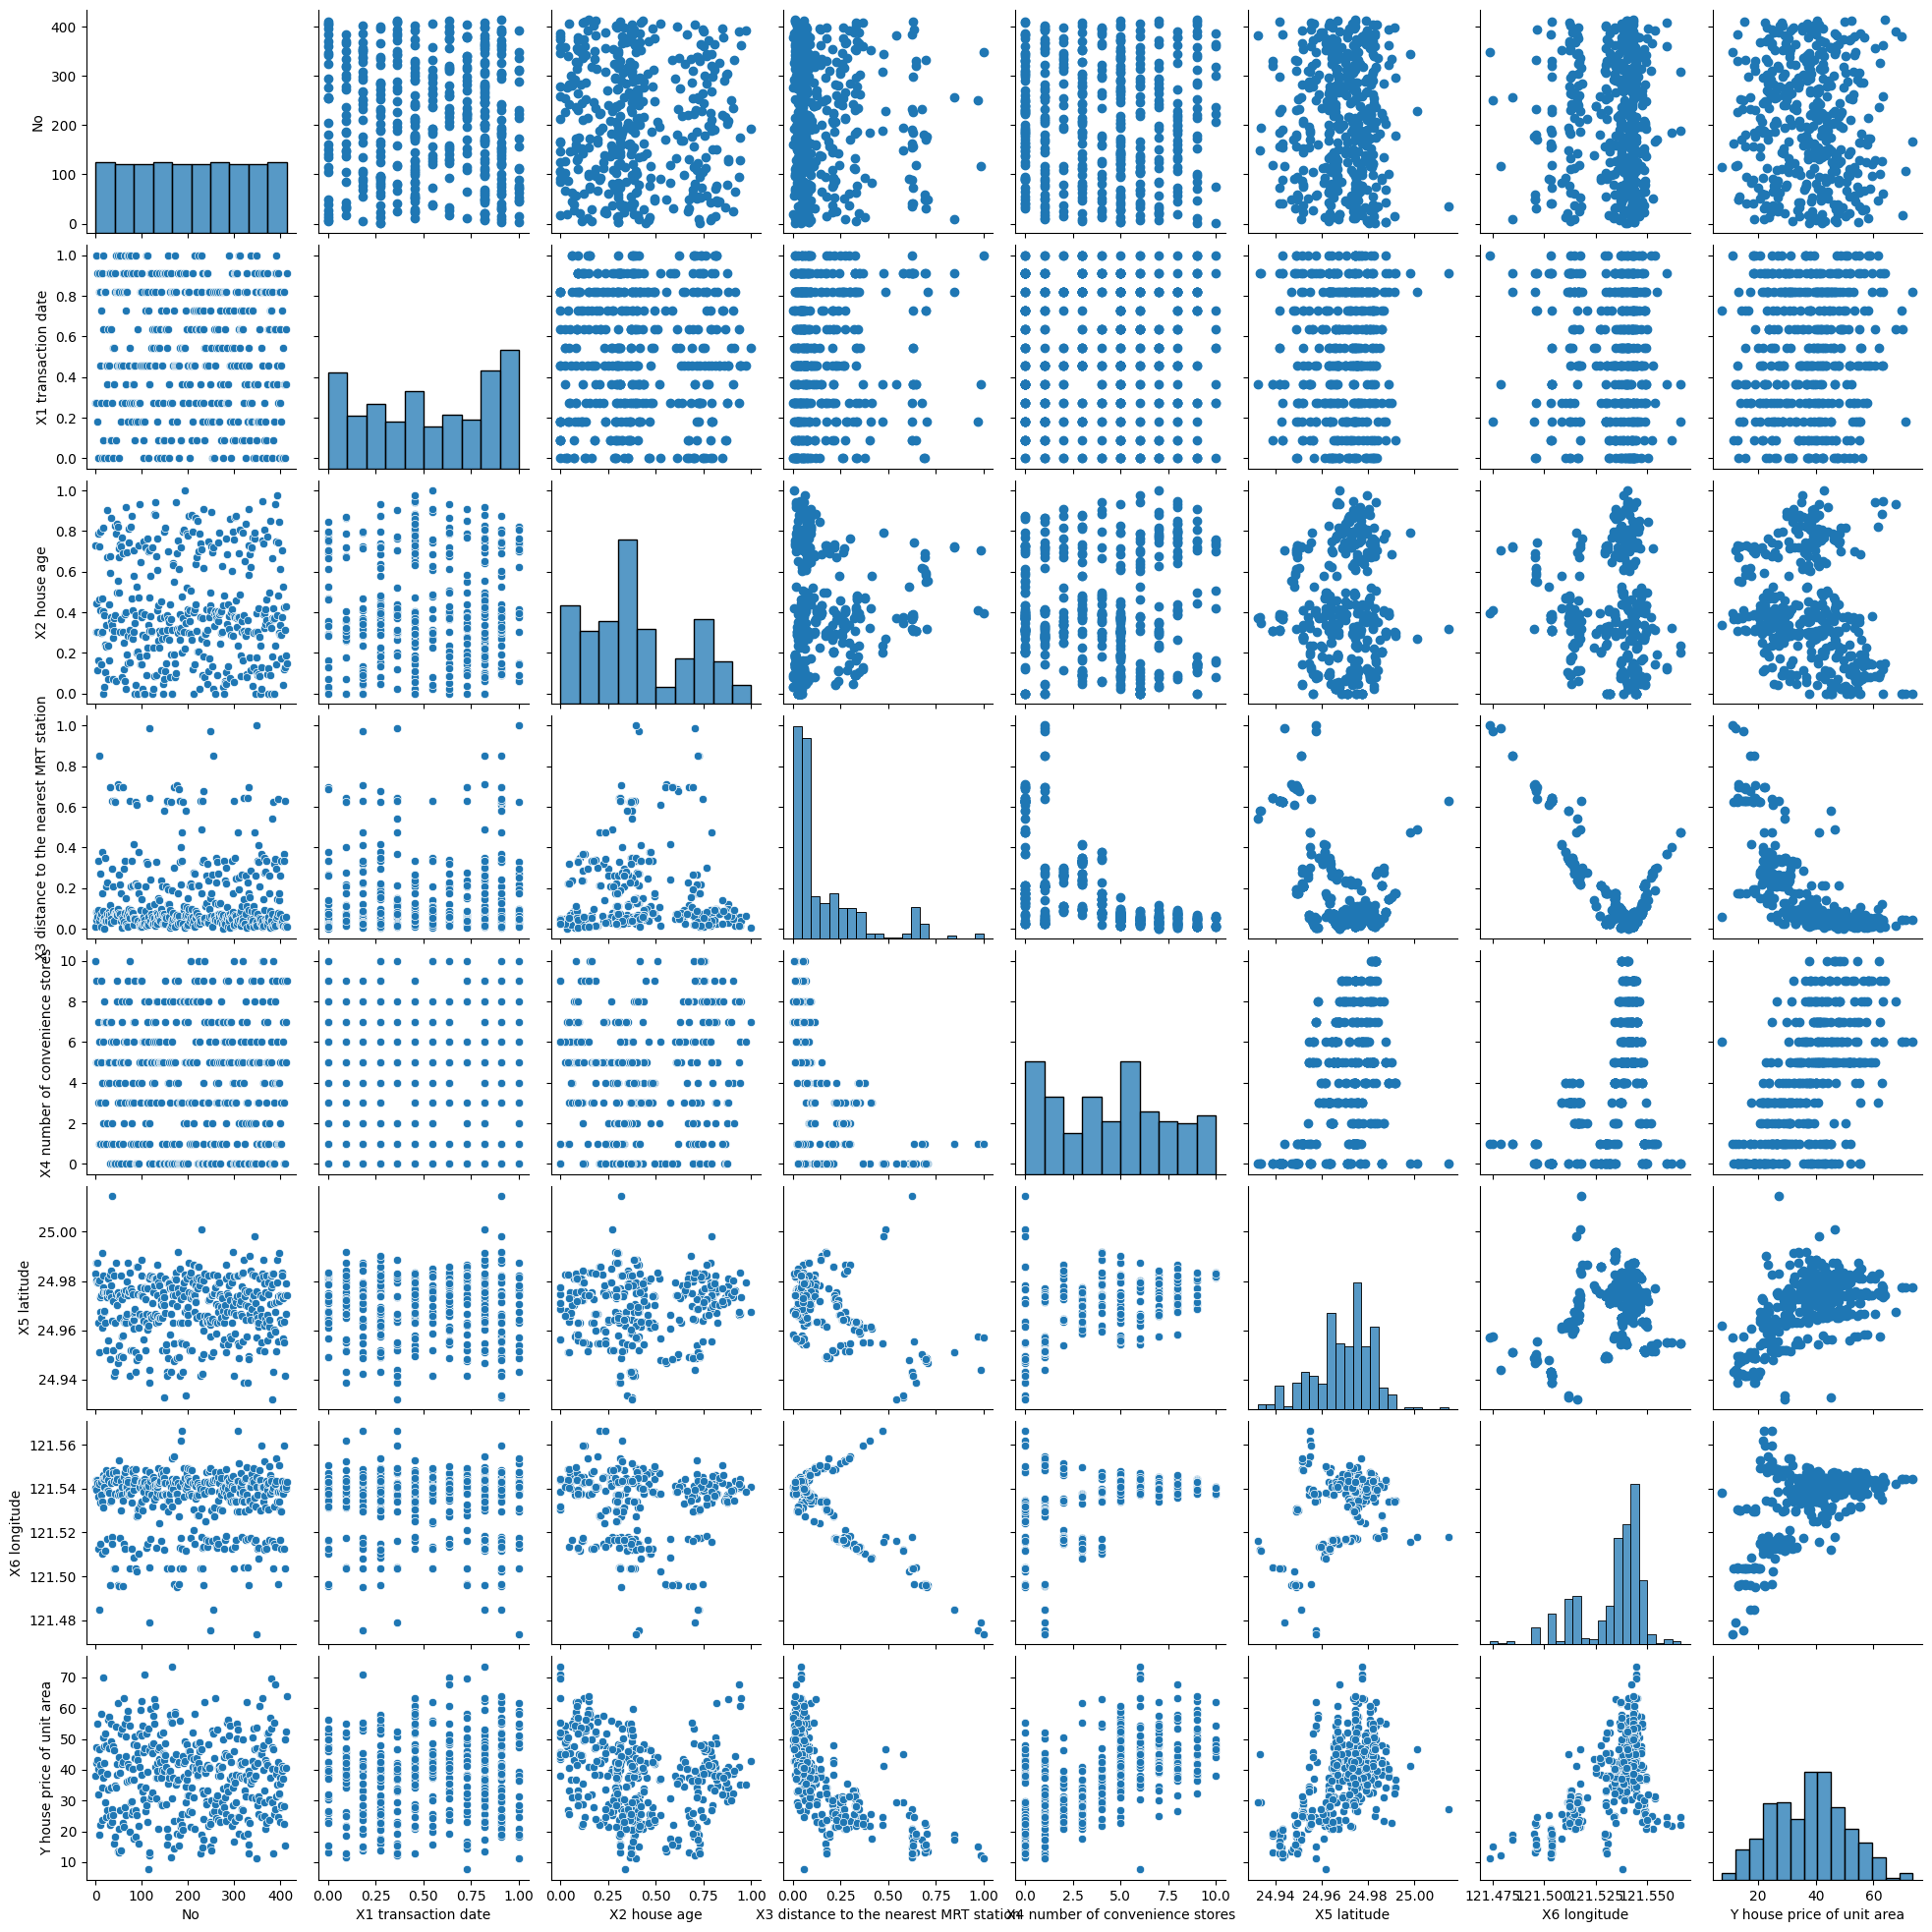

In [ ]:
g= sns.pairplot(df)
g.map_upper(plt.scatter)

<Axes: >

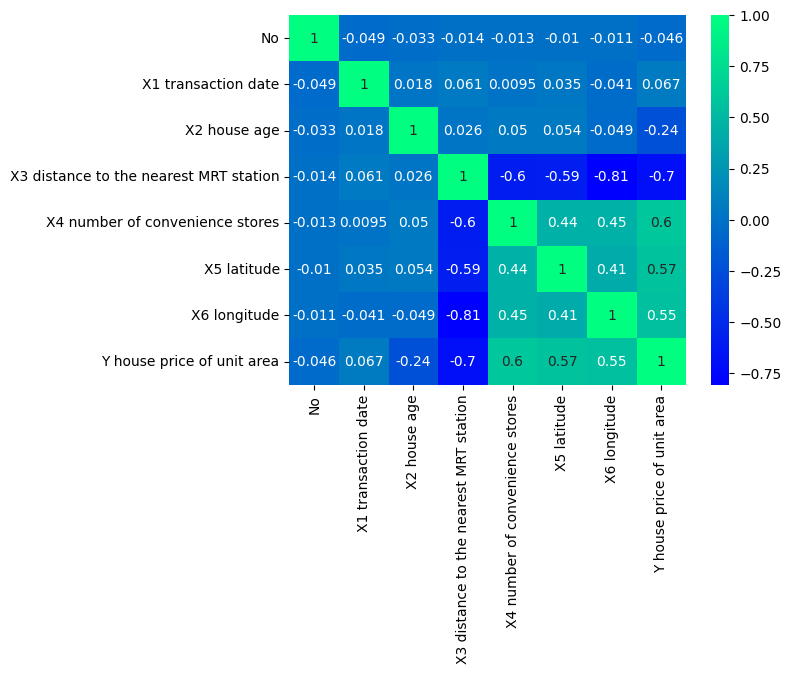

In [ ]:
# t√¨m m·ªëi t∆∞∆°ng quan theo c·∫∑p c·ªßa t·∫•t c·∫£ c√°c c·ªôt trong khung d·ªØ li·ªáu.
df.corr()
#Heatmap cho m·ªëi t∆∞∆°ng quan
sns.heatmap(df.corr(), annot=True,cmap='winter')

Text(0.5, 9.444444444444438, 'house price of unit area')

<Figure size 1000x400 with 0 Axes>

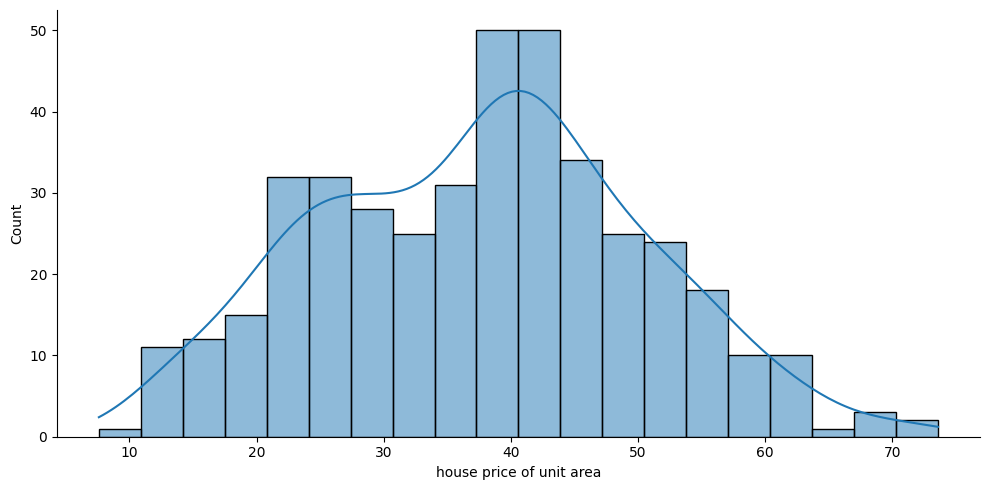

In [ ]:
plt.figure(figsize=(10,4))
sns.displot(df['Y house price of unit area'],kde=True,bins=20, aspect=2)
plt.xlabel('house price of unit area')

<Axes: xlabel='Y house price of unit area'>

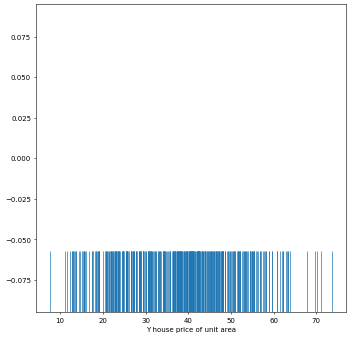

In [ ]:
plt.figure(figsize=(8, 8), dpi=50)

sns.rugplot(df['Y house price of unit area'], height=0.2)

<Axes: xlabel='X1 transaction date', ylabel='Y house price of unit area'>

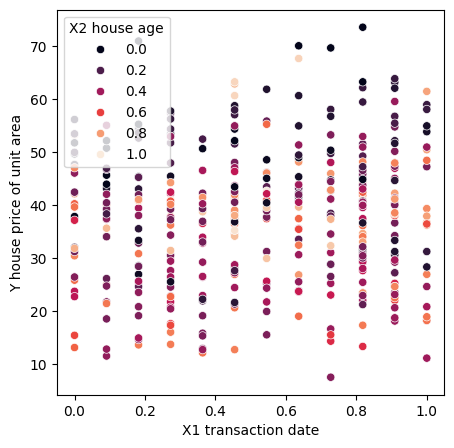

In [ ]:
plt.figure(figsize=(5, 5), dpi=100)

sns.scatterplot(data=df, y=df['Y house price of unit area'], x=df['X1 transaction date'] , hue= 'X2 house age', palette="rocket")


<Axes: xlabel='X3 distance to the nearest MRT station', ylabel='Y house price of unit area'>

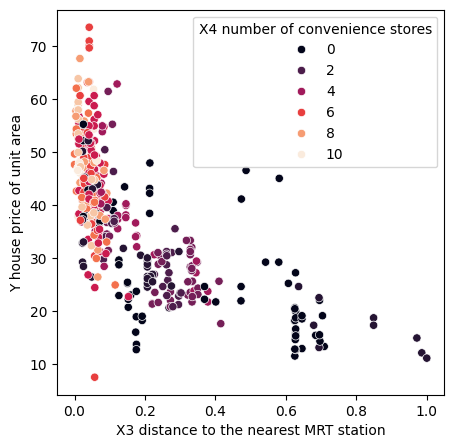

In [ ]:
plt.figure(figsize=(5, 5), dpi=100)

sns.scatterplot(data=df, y=df['Y house price of unit area'], x=df['X3 distance to the nearest MRT station'] , hue= 'X4 number of convenience stores', palette="rocket")

<Axes: xlabel='X5 latitude', ylabel='Y house price of unit area'>

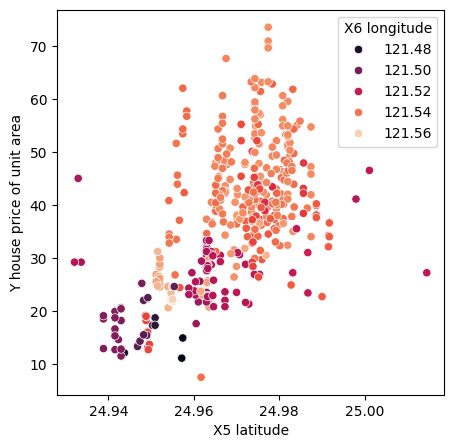

In [ ]:
plt.figure(figsize=(5, 5), dpi=100)

sns.scatterplot(data=df, y=df['Y house price of unit area'], x=df['X5 latitude'] , hue= 'X6 longitude', palette="rocket")

# Hu·∫•n luy·ªán m√¥ h√¨nh h·ªìi quy tuy·∫øn t√≠nh

<p>ƒê·∫ßu ti√™n <b>t√°ch</b> d·ªØ li·ªáu th√†nh m·ªôt m·∫£ng X ch·ª©a <b>c√°c t√≠nh nƒÉng</b> ƒë·ªÉ hu·∫•n luy·ªán v√† m·ªôt m·∫£ng y c√≥ bi·∫øn <b>m·ª•c ti√™u</b>, trong tr∆∞·ªùng h·ª£p n√†y l√† c·ªôt (Y gi√° nh√† ƒë∆°n v·ªã di·ªán t√≠ch).<p>

In [ ]:
X = df.drop(['No','Y house price of unit area'],axis=1)
y = df['Y house price of unit area']


In [ ]:
print("X=",X.shape,"\ny=", y.shape)

X= (414, 6) 
y= (414,)


In [ ]:
X.head()

X1 transaction date  X2 house age  X3 distance to the nearest MRT station  \
0             0.272727      0.730594                                0.009513   
1             0.272727      0.445205                                0.043809   
2             1.000000      0.303653                                0.083315   
3             0.909091      0.303653                                0.083315   
4             0.181818      0.114155                                0.056799   

   X4 number of convenience stores  X5 latitude  X6 longitude  
0                               10     24.98298     121.54024  
1                                9     24.98034     121.53951  
2                                5     24.98746     121.54391  
3                                5     24.98746     121.54391  
4                                5     24.97937     121.54245

In [ ]:
y.head()

0    37.9
1    42.2
2    47.3
3    54.8
4    43.1
Name: Y house price of unit area, dtype: float64

<p><b>Chia</b> d·ªØ li·ªáu th√†nh <b>hu·∫•n luy·ªán</b> v√† <b>ki·ªÉm tra</b></p>

In [ ]:
# hu·∫•n luy·ªán m√¥ h√¨nh tr√™n t·∫≠p hu·∫•n luy·ªán v√† sau ƒë√≥ s·ª≠ d·ª•ng t·∫≠p ki·ªÉm tra ƒë·ªÉ ƒë√°nh gi√° m√¥ h√¨nh.
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3,random_state = 101)

<h3>M√¥ h√¨nh hu·∫•n luy·ªán</h3>

In [ ]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

<H3>H·ªìi quy</H3>

In [ ]:
#h·ªá s·ªë c·ªßa m√¥ h√¨nh h·ªìi quy tuy·∫øn t√≠nh
lin_reg.coef_

pd.DataFrame(lin_reg.coef_, X.columns, columns=['Coedicients'])

Coedicients
X1 transaction date                        2.737026
X2 house age                             -13.241133
X3 distance to the nearest MRT station   -21.234096
X4 number of convenience stores            1.225590
X5 latitude                              246.644909
X6 longitude                              74.066053

<h3>D·ª± ƒëo√°n d·ªØ li·ªáu th·ª≠ nghi·ªám</h3>

In [ ]:
y_pred = lin_reg.predict(X_test)

In [ ]:
y_pred

array([13.73386886, 10.35917242, 26.46519611, 47.31183641, 33.24391962,
       36.95042927, 35.92967471, 40.15042756, 46.73434852, 39.3050233 ,
       44.02373391, 32.89877017, 38.55007738, 37.56103406, 44.08585276,
       46.29617906, 37.32308698, 44.44401855, 48.83969403, 46.59881648,
       40.00645009, 53.6042912 , 47.18083844, 35.97687655, 31.73573401,
       48.61238319, 39.16711926, 48.64775569, 45.49956521, 38.38736021,
       48.93519876, 40.48924747, 43.75591548, 43.97038192, 45.6856406 ,
        8.08410647, 36.75599346, 38.82015828,  8.27246511, 55.03984314,
       31.75655979, 47.95601567, 23.48170354, 47.32863697, 41.1032198 ,
       50.22615709, 40.74815438, 36.15367831, 43.53766183, 35.12362895,
       46.66975267, 34.47421148, 42.29842649, 15.36701377, 37.4071631 ,
       48.2075058 , 43.22895353, 44.99441854, 44.16255839, 40.29797118,
       32.14221629, 43.10690934, 41.39383683, 42.38759824, 53.14995143,
       43.15688035, 25.29013345, 47.3740133 , 30.41932925, 39.39

In [ ]:
from sklearn.metrics import r2_score
y_pred=lin_reg.predict(X_test)
print("R2 score of model: {}".format(r2_score(y_test,y_pred)))

R2 score of model: 0.6490287547842084


R¬≤ Cao: V·ªõi R¬≤ g·∫ßn b·∫±ng 1, m√¥ h√¨nh h·ªìi quy tuy·∫øn t√≠nh ƒëang l√†m r·∫•t t·ªët vi·ªác gi·∫£i th√≠ch s·ª± bi·∫øn thi√™n c·ªßa bi·∫øn ph·ª• thu·ªôc. ƒêi·ªÅu n√†y cho th·∫•y m√¥ h√¨nh c√≥ ƒë·ªô ch√≠nh x√°c cao v√† ph√π h·ª£p v·ªõi d·ªØ li·ªáu.

<h3>Ch·ªâ s·ªë ƒë√°nh gi√° h·ªìi quy</h3>
<ul><b>
    <li>1-MeanAbsolute Error.</li>
    <li>2-Mean Squared Error.</li>
    <li>3-R^2</li>
   </b>
  </ul>

## ‚úîÔ∏è S·ªë li·ªáu ƒë√°nh gi√° h·ªìi quy

D∆∞·ªõi ƒë√¢y l√† ba s·ªë li·ªáu ƒë√°nh gi√° ph·ªï bi·∫øn cho c√°c v·∫•n ƒë·ªÅ h·ªìi quy:
> - **Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:
$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

> - **Mean Squared Error** (MSE) is the mean of the squared errors:
$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

> - **Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:
$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

> üìå So s√°nh c√°c s·ªë li·ªáu n√†y:
- **MAE** l√† d·ªÖ hi·ªÉu nh·∫•t v√¨ ƒë√≥ l√† l·ªói trung b√¨nh.
- **MSE** ph·ªï bi·∫øn h∆°n MAE, v√¨ MSE "tr·ª´ng ph·∫°t" c√°c l·ªói l·ªõn h∆°n, c√≥ xu h∆∞·ªõng h·ªØu √≠ch trong th·∫ø gi·ªõi th·ª±c.
- **RMSE** th·∫≠m ch√≠ c√≤n ph·ªï bi·∫øn h∆°n MSE v√¨ RMSE c√≥ th·ªÉ hi·ªÉu ƒë∆∞·ª£c theo ƒë∆°n v·ªã "y".

> T·∫•t c·∫£ nh·ªØng th·ª© n√†y ƒë·ªÅu l√† **h√†m m·∫•t m√°t**, v√¨ ch√∫ng t√¥i mu·ªën gi·∫£m thi·ªÉu ch√∫ng.

In [ ]:
MAE = metrics.mean_absolute_error(y_test,y_pred)
MSE = metrics.mean_squared_error(y_test,y_pred)
RMSE = np.sqrt(MSE)

pd.DataFrame([MAE,MSE,RMSE],index=['MAE', 'MSE', 'RMSE'], columns=['Metrics'])

Metrics
MAE    5.334487
MSE   46.460281
RMSE   6.816178

In [ ]:
df['Y house price of unit area'] .mean()

37.594059371280544

<h3>C√°c l√¥ ƒë·∫•t c√≤n l·∫°i</h3>

In [ ]:
#Gi√° tr·ªã d∆∞
test_residuals=y_test - y_pred

Text(0, 0.5, 'Y-Pred')

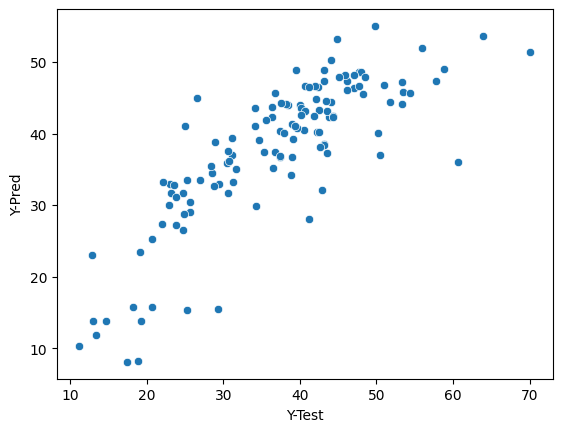

In [ ]:
# bi·ªÉu ƒë·ªì ph√¢n t√°n ƒë·ªÉ bi·ªÉu di·ªÖn m·ªëi quan h·ªá gi·ªØa gi√° tr·ªã th·ª±c t·∫ø (y_test) v√† gi√° tr·ªã d·ª± ƒëo√°n (y_pred). C·ª• th·ªÉ:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Y-Test')
plt.ylabel('Y-Pred')

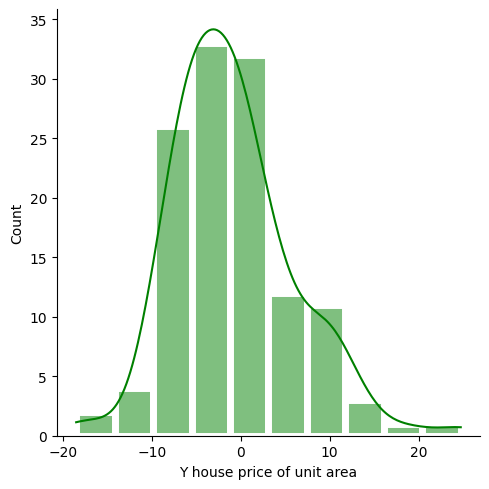

In [ ]:
#Bi·ªÉu ƒë·ªì ph√¢n ph·ªëi ph·∫ßn d∆∞
#Bi·ªÉu ƒë·ªì n√†y hi·ªÉn th·ªã s·ªë l∆∞·ª£ng ph·∫ßn d∆∞ n·∫±m trong m·ªói kho·∫£ng gi√° tr·ªã v√†
#ƒë∆∞·ªùng cong KDE m√¥ t·∫£ ph√¢n ph·ªëi x√°c su·∫•t c·ªßa c√°c ph·∫ßn d∆∞.
sns.displot(test_residuals, bins=10, kde=True ,color='g', edgecolor='white', linewidth=5)


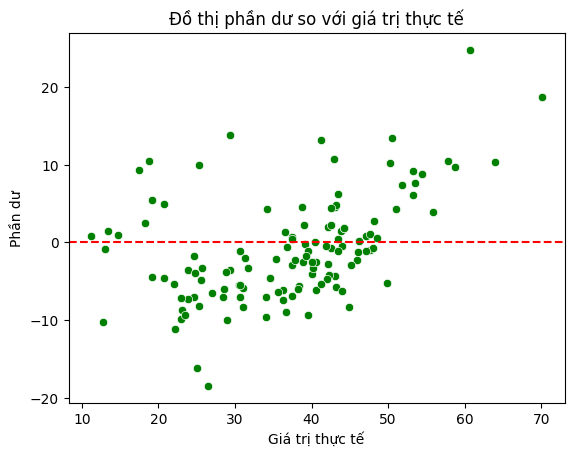

In [ ]:
# V·∫Ω ƒë·ªì th·ªã ph√¢n t√°n gi·ªØa gi√° tr·ªã th·ª±c t·∫ø v√† ph·∫ßn d∆∞
sns.scatterplot(x=y_test, y=test_residuals, color='g')
plt.axhline(y=0, color='r', ls='--')
plt.xlabel('Gi√° tr·ªã th·ª±c t·∫ø')
plt.ylabel('Ph·∫ßn d∆∞')
plt.title('ƒê·ªì th·ªã ph·∫ßn d∆∞ so v·ªõi gi√° tr·ªã th·ª±c t·∫ø')
plt.show()

In [ ]:
# Tr√≠ch xu·∫•t c√°c h·ªá s·ªë c·ªßa m√¥ h√¨nh
intercept_1 = lin_reg.intercept_
coefficients_1 = lin_reg.coef_

# Hi·ªÉn th·ªã ph∆∞∆°ng tr√¨nh h·ªìi quy
features = ['X1 transaction date','X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores',
            'X5 latitude', 'X6 longitude']
equation = f"Y = {intercept_1:.4f}"
for coef, feature in zip(coefficients_1, features):
    equation += f" + ({coef:.4f} * {feature})"

print("Ph∆∞∆°ng tr√¨nh h·ªìi quy:")
print(equation)

Ph∆∞∆°ng tr√¨nh h·ªìi quy:
Y = -15119.7380 + (2.7370 * X1 transaction date) + (-13.2411 * X2 house age) + (-21.2341 * X3 distance to the nearest MRT station) + (1.2256 * X4 number of convenience stores) + (246.6449 * X5 latitude) + (74.0661 * X6 longitude)


# Hu·∫•n luy·ªán m√¥ h√¨nh h·ªìi quy ƒëa th·ª©c
Polynomial Regression

<h1> <p style="font-family: "Times New Roman", Times, serif;">Gi·ªõi thi·ªáu</p></h1>

<b>H·ªìi quy ƒëa th·ª©c</b>

<p>M·ªôt m√¥ h√¨nh ph·ªï bi·∫øn trong h·ªçc m√°y l√† s·ª≠ d·ª•ng c√°c m√¥ h√¨nh tuy·∫øn t√≠nh ƒë∆∞·ª£c ƒë√†o t·∫°o v·ªÅ c√°c h√†m phi tuy·∫øn c·ªßa d·ªØ li·ªáu. C√°ch ti·∫øp c·∫≠n n√†y duy tr√¨ hi·ªáu su·∫•t n√≥i chung l√† nhanh c·ªßa c√°c ph∆∞∆°ng ph√°p tuy·∫øn t√≠nh, ƒë·ªìng th·ªùi cho ph√©p ch√∫ng ph√π h·ª£p v·ªõi ph·∫°m vi d·ªØ li·ªáu r·ªông h∆°n nhi·ªÅu.

V√≠ d·ª•:<a href="https://www.kaggle.com/mahyamahjoob/real-estate-valuation-using-ographic-regression">h·ªìi quy tuy·∫øn t√≠nh ƒë∆°n gi·∫£n</a> c√≥ th·ªÉ ƒë∆∞·ª£c m·ªü r·ªông b·∫±ng c√°ch x√¢y d·ª±ng c√°c ƒë·∫∑c ƒëi·ªÉm ƒëa th·ª©c t·ª´ c√°c h·ªá s·ªë. Trong tr∆∞·ªùng h·ª£p h·ªìi quy tuy·∫øn t√≠nh ti√™u chu·∫©n, b·∫°n c√≥ th·ªÉ c√≥ m·ªôt m√¥ h√¨nh gi·ªëng nh∆∞ th·∫ø n√†y cho d·ªØ li·ªáu hai chi·ªÅu:
<H2>y^(w,x)=w0+w1x1+w2x2</H2>
N·∫øu mu·ªën kh·ªõp m·ªôt h√¨nh paraboloid v·ªõi d·ªØ li·ªáu thay v√¨ m·ªôt m·∫∑t ph·∫≥ng, ch√∫ng ta c√≥ th·ªÉ k·∫øt h·ª£p c√°c ƒë·∫∑c ƒëi·ªÉm trong ƒëa th·ª©c b·∫≠c hai ƒë·ªÉ m√¥ h√¨nh tr√¥ng nh∆∞ th·∫ø n√†y:

<H2>y^(w,x)=w0+w1x1+w2x2+w3x1x2+w4x21+w5x22</H2>

Quan s√°t (ƒë√¥i khi ƒë√°ng ng·∫°c nhi√™n) l√† ƒë√¢y v·∫´n l√† m·ªôt m√¥ h√¨nh tuy·∫øn t√≠nh: ƒë·ªÉ th·∫•y ƒëi·ªÅu n√†y, h√£y t∆∞·ªüng t∆∞·ª£ng vi·ªác t·∫°o m·ªôt bi·∫øn m·ªõi

<H2>z=[x1,x2,x1x2,x21,x22]</H2>

V·ªõi vi·ªác d√°n nh√£n l·∫°i d·ªØ li·ªáu n√†y, v·∫•n ƒë·ªÅ c·ªßa ch√∫ng t√¥i c√≥ th·ªÉ ƒë∆∞·ª£c vi·∫øt:
    
<H2> y^(w,x)=w0+w1z1+w2z2+w3z3+w4z4+w5z5 </H2>

Ch√∫ng t√¥i th·∫•y r·∫±ng h·ªìi quy ƒëa th·ª©c thu ƒë∆∞·ª£c thu·ªôc c√πng lo·∫°i m√¥ h√¨nh tuy·∫øn t√≠nh m√† ch√∫ng t√¥i ƒë√£ xem x√©t ·ªü tr√™n (t·ª©c l√† m√¥ h√¨nh tuy·∫øn t√≠nh theo w) v√† c√≥ th·ªÉ ƒë∆∞·ª£c gi·∫£i b·∫±ng c√°c k·ªπ thu·∫≠t t∆∞∆°ng t·ª±. B·∫±ng c√°ch xem x√©t s·ª± ph√π h·ª£p tuy·∫øn t√≠nh trong m·ªôt kh√¥ng gian c√≥ chi·ªÅu cao h∆°n ƒë∆∞·ª£c x√¢y d·ª±ng b·∫±ng c√°c h√†m c∆° b·∫£n n√†y, m√¥ h√¨nh c√≥ kh·∫£ nƒÉng linh ho·∫°t ƒë·ªÉ ph√π h·ª£p v·ªõi ph·∫°m vi d·ªØ li·ªáu r·ªông h∆°n nhi·ªÅu.</p>
<p>
<h4><b>Ngu·ªìn:</b><a href="https://scikit-learn.org/stable/modules/Tuy·∫øn_model.html#polynomial-regression-extending-Tuy·∫øn t√≠nh-models-with-basis-functions ">scikit-learn</a>
</h4></p>


In [ ]:
X = df.drop(['No','Y house price of unit area'],axis=1)
y = df['Y house price of unit area']

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
PF=PolynomialFeatures(degree=2, include_bias=False)
poly_features=PF.fit_transform(X)

In [ ]:
poly_features.shape

(414, 27)

In [ ]:
# hu·∫•n luy·ªán m√¥ h√¨nh tr√™n t·∫≠p hu·∫•n luy·ªán v√† sau ƒë√≥ s·ª≠ d·ª•ng t·∫≠p ki·ªÉm tra ƒë·ªÉ ƒë√°nh gi√° m√¥ h√¨nh.
X_train, X_test, y_train, y_test = train_test_split(
    poly_features, y, test_size=0.3, random_state=101)


In [ ]:
from sklearn.linear_model import LinearRegression
polymodel=LinearRegression()
polymodel.fit(X_train, y_train)

LinearRegression()

<h3>D·ª± ƒëo√°n d·ªØ li·ªáu th·ª≠ nghi·ªám</h3>

In [ ]:
y_pred=polymodel.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
Y_pred=polymodel.predict(X_test)
print("R2 score of polymodel: {}".format(r2_score(y_test,y_pred)))

R2 score of polymodel: 0.771416577201394


In [ ]:
#gi√° tr·ªã th·ª±c t·∫ø, gi√° tr·ªã d·ª± ƒëo√°n v√† sai s·ªë t∆∞∆°ng ·ª©ng.
pd.DataFrame({'Y_Test': y_test,'Y_Pred':y_pred, 'Residuals':(y_test-y_pred) }).head(5)


Y_Test     Y_Pred  Residuals
176    19.2  16.347940   2.852060
347    11.2   7.878505   3.321495
307    24.7  16.345533   8.354467
299    46.1  42.203633   3.896367
391    31.3  33.171082  -1.871082

In [ ]:
#print(pd.DataFrame({'Y_Test': Y_test,'Y_Pred':Y_pred, 'Residuals':(Y_test-Y_pred) }).to_string())

<h3>ƒê√°nh gi√° m√¥ h√¨nh</h3>

In [ ]:
MAE_Poly = metrics.mean_absolute_error(y_test,y_pred)
MSE_Poly = metrics.mean_squared_error(y_test,y_pred)
RMSE_Poly = np.sqrt(MSE_Poly)

pd.DataFrame([MAE_Poly, MSE_Poly, RMSE_Poly],
             index=['MAE', 'MSE', 'RMSE'], columns=['metrics'])

metrics
MAE    4.478386
MSE   30.259031
RMSE   5.500821

Text(0, 0.5, 'Y-Pred')

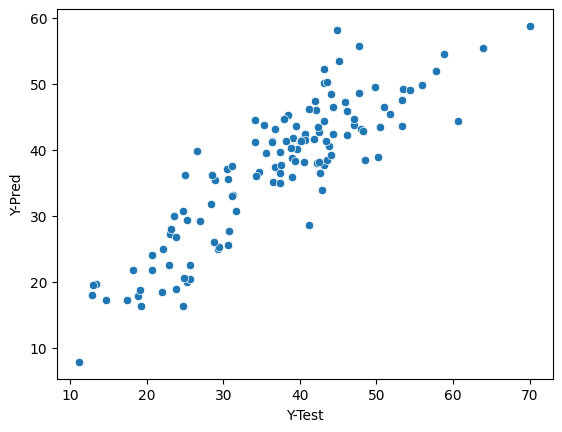

In [ ]:
# bi·ªÉu ƒë·ªì ph√¢n t√°n ƒë·ªÉ bi·ªÉu di·ªÖn m·ªëi quan h·ªá gi·ªØa gi√° tr·ªã th·ª±c t·∫ø (y_test) v√† gi√° tr·ªã d·ª± ƒëo√°n (y_pred). C·ª• th·ªÉ:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Y-Test')
plt.ylabel('Y-Pred')

In [ ]:
#Gi√° tr·ªã d∆∞
residuals=y_test - y_pred


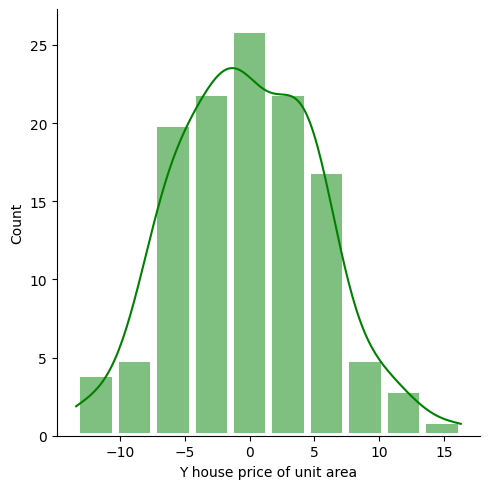

In [ ]:
#ki·ªÉm tra v√† ƒë√°nh gi√° ph√¢n ph·ªëi c·ªßa c√°c ph·∫ßn d∆∞
sns.displot(residuals, bins=10, kde=True ,color='g', edgecolor='white', linewidth=5)


Bi·ªÉu ƒë·ªì histogram k·∫øt h·ª£p v·ªõi ƒë∆∞·ªùng cong m·∫≠t ƒë·ªô (KDE) ƒë∆∞·ª£c s·ª≠ d·ª•ng ƒë·ªÉ ki·ªÉm tra ph√¢n ph·ªëi c·ªßa c√°c ph·∫ßn d∆∞. Bi·ªÉu ƒë·ªì n√†y hi·ªÉn th·ªã s·ªë l∆∞·ª£ng ph·∫ßn d∆∞ n·∫±m trong m·ªói kho·∫£ng gi√° tr·ªã v√† ƒë∆∞·ªùng cong KDE m√¥ t·∫£ ph√¢n ph·ªëi x√°c su·∫•t c·ªßa c√°c ph·∫ßn d∆∞.

 ph√¢n t√≠ch ph√¢n ph·ªëi c·ªßa ph·∫ßn d∆∞ cho th·∫•y r·∫±ng c√°c ph·∫ßn d∆∞ c√≥ ph√¢n ph·ªëi g·∫ßn v·ªõi ph√¢n ph·ªëi chu·∫©n, ƒëi·ªÅu n√†y cho th·∫•y r·∫±ng c√°c gi·∫£ ƒë·ªãnh c·ªßa m√¥ h√¨nh h·ªìi quy tuy·∫øn t√≠nh ƒë∆∞·ª£c th·ªèa m√£n v√† m√¥ h√¨nh c√≥ hi·ªáu su·∫•t t·ªët.

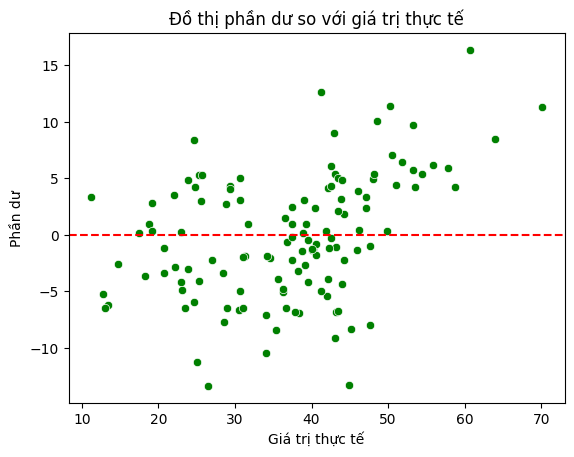

In [ ]:
# V·∫Ω ƒë·ªì th·ªã scatter plot gi·ªØa gi√° tr·ªã th·ª±c t·∫ø v√† ph·∫ßn d∆∞
sns.scatterplot(x=y_test, y=residuals, color='g')
plt.axhline(y=0, color='r', ls='--')
plt.xlabel('Gi√° tr·ªã th·ª±c t·∫ø')
plt.ylabel('Ph·∫ßn d∆∞')
plt.title('ƒê·ªì th·ªã ph·∫ßn d∆∞ so v·ªõi gi√° tr·ªã th·ª±c t·∫ø')
plt.show()

ƒê·ªì th·ªã ph√¢n t√°n gi·ªØa gi√° tr·ªã th·ª±c t·∫ø v√† ph·∫ßn d∆∞ l√† m·ªôt c√¥ng c·ª• h·ªØu √≠ch ƒë·ªÉ ki·ªÉm tra t√≠nh ch√≠nh x√°c c·ªßa m√¥ h√¨nh h·ªìi quy. N√≥ gi√∫p ƒë√°nh gi√° xem ph·∫ßn d∆∞ c√≥ ph√¢n ph·ªëi ng·∫´u nhi√™n quanh gi√° tr·ªã 0 hay kh√¥ng, t·ª´ ƒë√≥ ki·ªÉm tra gi·∫£ ƒë·ªãnh c·ªßa m√¥ h√¨nh h·ªìi quy v√† ph√°t hi·ªán c√°c ƒëi·ªÉm b·∫•t th∆∞·ªùng.

In [ ]:
# Ch·ªçn c√°c ƒë·∫∑c tr∆∞ng v√† m·ª•c ti√™u
X = df[['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']]
y = df['Y house price of unit area']

# Chu·∫©n h√≥a d·ªØ li·ªáu
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

# T·∫°o c√°c ƒë·∫∑c tr∆∞ng ƒëa th·ª©c
PF = PolynomialFeatures(degree=2, include_bias=False)
X_poly = PF.fit_transform(X_scaled)

# Chia d·ªØ li·ªáu th√†nh t·∫≠p hu·∫•n luy·ªán v√† t·∫≠p ki·ªÉm tra
X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=101)

# Hu·∫•n luy·ªán m√¥ h√¨nh h·ªìi quy ƒëa th·ª©c
polymodel = LinearRegression()
polymodel.fit(X_train, y_train)

# Truy xu·∫•t h·ªá s·ªë v√† giao ƒëi·ªÉm
coefficients = polymodel.coef_
intercept = polymodel.intercept_

# Hi·ªÉn th·ªã c√°c bi·∫øn
feature_names = PF.get_feature_names_out(['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station', 'X4 number of convenience stores', 'X5 latitude', 'X6 longitude'])

# Hi·ªÉn th·ªã ph∆∞∆°ng tr√¨nh h·ªìi quy ƒëa th·ª©c
equation = f"Y = {intercept:.4f} + "
for coef, feature in zip(coefficients, feature_names):
    equation += f"({coef:.4f} * {feature}) + "

# Lo·∫°i b·ªè d·∫•u "+" cu·ªëi c√πng
equation = equation.rstrip(" + ")
print("Ph∆∞∆°ng tr√¨nh h·ªìi quy ƒëa th·ª©c l√†:\n", equation)

Ph∆∞∆°ng tr√¨nh h·ªìi quy ƒëa th·ª©c l√†:
 Y = -55.3433 + (1.4919 * X1 transaction date) + (-37.0560 * X2 house age) + (89.5931 * X3 distance to the nearest MRT station) + (74.8746 * X4 number of convenience stores) + (101.8644 * X5 latitude) + (141.3042 * X6 longitude) + (4.5632 * X1 transaction date^2) + (-0.3529 * X1 transaction date X2 house age) + (-0.7836 * X1 transaction date X3 distance to the nearest MRT station) + (-1.9644 * X1 transaction date X4 number of convenience stores) + (-16.6411 * X1 transaction date X5 latitude) + (8.8463 * X1 transaction date X6 longitude) + (41.6364 * X2 house age^2) + (6.9902 * X2 house age X3 distance to the nearest MRT station) + (-3.2417 * X2 house age X4 number of convenience stores) + (-27.8541 * X2 house age X5 latitude) + (-0.0041 * X2 house age X6 longitude) + (-8.1235 * X3 distance to the nearest MRT station^2) + (-78.4613 * X3 distance to the nearest MRT station X4 number of convenience stores) + (-125.9188 * X3 distance to the nearest

# V√≠ d·ª•

In [ ]:
df.head(10)

No  X1 transaction date  X2 house age  \
0   1             0.272727      0.730594   
1   2             0.272727      0.445205   
2   3             1.000000      0.303653   
3   4             0.909091      0.303653   
4   5             0.181818      0.114155   
5   6             0.000000      0.162100   
6   7             0.000000      0.787671   
7   8             0.818182      0.463470   
8   9             0.909091      0.723744   
9  10             0.818182      0.408676   

   X3 distance to the nearest MRT station  X4 number of convenience stores  \
0                                0.009513                               10   
1                                0.043809                                9   
2                                0.083315                                5   
3                                0.083315                                5   
4                                0.056799                                5   
5                                0.332833                                3   
6                                0.092827                                7   
7                                0.040872                                6   
8                                0.849027                                1   
9                                0.272219                                3   

   X5 latitude  X6 longitude  Y house price of unit area  
0     24.98298     121.54024                        37.9  
1     24.98034     121.53951                        42.2  
2     24.98746     121.54391                        47.3  
3     24.98746     121.54391                        54.8  
4     24.97937     121.54245                        43.1  
5     24.96305     121.51254                        32.1  
6     24.97933     121.53642                        40.3  
7     24.98042     121.54228                        46.7  
8     24.95095     121.48458                        18.8  
9     24.96731     121.51486                        22.1

#So s√°nh h·ªìi quy tuy·∫øn t√≠nh v√† h·ªìi quy ƒëa th·ª©c

In [ ]:
XS_train, XS_test, ys_train, ys_test = train_test_split(X, y, test_size=0.3, random_state=101)
simplemodel=LinearRegression()
simplemodel.fit(XS_train, ys_train)
ys_pred=simplemodel.predict(XS_test)

MAE_simple = metrics.mean_absolute_error(ys_test,ys_pred)
MSE_simple = metrics.mean_squared_error(ys_test,ys_pred)
RMSE_simple = np.sqrt(MSE_simple)

In [ ]:
pd.DataFrame({'Poly Metrics': [MAE_Poly, MSE_Poly, RMSE_Poly], 'Simple Metrics':[MAE_simple, MSE_simple,
                                                                                 RMSE_simple]}, index=['MAE', 'MSE', 'RMSE'])


Poly Metrics  Simple Metrics
MAE       4.478386        5.334487
MSE      30.259031       46.460281
RMSE      5.500821        6.816178

In [ ]:
# H·ªìi quy tuy·∫øn t√≠nh
# D·ªØ li·ªáu ƒë·∫∑c tr∆∞ng c·ªßa cƒÉn nh√† m·ªõi
new_house = {
    'X1 transaction date': 2023,
    'X2 house age': 10,
    'X3 distance to the nearest MRT station': 250,
    'X4 number of convenience stores': 5,
    'X5 latitude': 24.972,
    'X6 longitude': 121.541
}

# T·∫°o DataFrame t·ª´ ƒë·∫∑c ƒëi·ªÉm c·ªßa cƒÉn nh√† m·ªõi
new_house_df = pd.DataFrame([new_house])

# Ch·ªçn c√°c ƒë·∫∑c tr∆∞ng ƒë·ªÉ d·ª± ƒëo√°n
features = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station',
            'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']

# S·ª≠ d·ª•ng m√¥ h√¨nh h·ªìi quy tuy·∫øn t√≠nh ƒë·ªÉ d·ª± ƒëo√°n gi√° b·∫•t ƒë·ªông s·∫£n
predicted_price = lin_reg.predict(new_house_df[features])

# Gi√° tr·ªã d·ª± ƒëo√°n l√† gi√° tr·ªã th·ª±c t·∫ø
predicted_price_log = predicted_price

print(f'D·ª± ƒëo√°n gi√° b·∫•t ƒë·ªông s·∫£n: {predicted_price_log[0]:.2f}')


D·ª± ƒëo√°n gi√° b·∫•t ƒë·ªông s·∫£n: 143.74


In [ ]:
# H·ªìi quy tuy·∫øn t√≠nh
# D·ªØ li·ªáu ƒë·∫∑c tr∆∞ng c·ªßa cƒÉn nh√† m·ªõi
new_house = {
    'X1 transaction date': 2023,
    'X2 house age': 20,
    'X3 distance to the nearest MRT station': 250,
    'X4 number of convenience stores': 5,
    'X5 latitude': 24.972,
    'X6 longitude': 121.541
}

# T·∫°o DataFrame t·ª´ ƒë·∫∑c ƒëi·ªÉm c·ªßa cƒÉn nh√† m·ªõi
new_house_df = pd.DataFrame([new_house])

# Ch·ªçn c√°c ƒë·∫∑c tr∆∞ng ƒë·ªÉ d·ª± ƒëo√°n
features = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station',
            'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']

# S·ª≠ d·ª•ng m√¥ h√¨nh h·ªìi quy tuy·∫øn t√≠nh ƒë·ªÉ d·ª± ƒëo√°n gi√° b·∫•t ƒë·ªông s·∫£n
predicted_price = lin_reg.predict(new_house_df[features])

# Gi√° tr·ªã d·ª± ƒëo√°n l√† gi√° tr·ªã th·ª±c t·∫ø
predicted_price_log = predicted_price

print(f'D·ª± ƒëo√°n gi√° b·∫•t ƒë·ªông s·∫£n: {predicted_price_log[0]:.2f}')


D·ª± ƒëo√°n gi√° b·∫•t ƒë·ªông s·∫£n: 11.33


In [ ]:
# H·ªìi quy tuy·∫øn t√≠nh
# D·ªØ li·ªáu ƒë·∫∑c tr∆∞ng c·ªßa cƒÉn nh√† m·ªõi
new_house = {
    'X1 transaction date': 2023,
    'X2 house age': 10,
    'X3 distance to the nearest MRT station': 255,
    'X4 number of convenience stores': 5,
    'X5 latitude': 24.972,
    'X6 longitude': 121.541
}

# T·∫°o DataFrame t·ª´ ƒë·∫∑c ƒëi·ªÉm c·ªßa cƒÉn nh√† m·ªõi
new_house_df = pd.DataFrame([new_house])

# Ch·ªçn c√°c ƒë·∫∑c tr∆∞ng ƒë·ªÉ d·ª± ƒëo√°n
features = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station',
            'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']

# S·ª≠ d·ª•ng m√¥ h√¨nh h·ªìi quy tuy·∫øn t√≠nh ƒë·ªÉ d·ª± ƒëo√°n gi√° b·∫•t ƒë·ªông s·∫£n
predicted_price = lin_reg.predict(new_house_df[features])

# Gi√° tr·ªã d·ª± ƒëo√°n l√† gi√° tr·ªã th·ª±c t·∫ø
predicted_price_log = predicted_price

print(f'D·ª± ƒëo√°n gi√° b·∫•t ƒë·ªông s·∫£n: {predicted_price_log[0]:.2f}')


D·ª± ƒëo√°n gi√° b·∫•t ƒë·ªông s·∫£n: 37.57


In [ ]:
# H·ªìi quy tuy·∫øn t√≠nh
# D·ªØ li·ªáu ƒë·∫∑c tr∆∞ng c·ªßa cƒÉn nh√† m·ªõi
new_house = {
    'X1 transaction date': 2023,
    'X2 house age': 10,
    'X3 distance to the nearest MRT station': 250,
    'X4 number of convenience stores': 10,
    'X5 latitude': 24.972,
    'X6 longitude': 121.541
}

# T·∫°o DataFrame t·ª´ ƒë·∫∑c ƒëi·ªÉm c·ªßa cƒÉn nh√† m·ªõi
new_house_df = pd.DataFrame([new_house])

# Ch·ªçn c√°c ƒë·∫∑c tr∆∞ng ƒë·ªÉ d·ª± ƒëo√°n
features = ['X1 transaction date', 'X2 house age', 'X3 distance to the nearest MRT station',
            'X4 number of convenience stores', 'X5 latitude', 'X6 longitude']

# S·ª≠ d·ª•ng m√¥ h√¨nh h·ªìi quy tuy·∫øn t√≠nh ƒë·ªÉ d·ª± ƒëo√°n gi√° b·∫•t ƒë·ªông s·∫£n
predicted_price = lin_reg.predict(new_house_df[features])

# Gi√° tr·ªã d·ª± ƒëo√°n l√† gi√° tr·ªã th·ª±c t·∫ø
predicted_price_log = predicted_price

print(f'D·ª± ƒëo√°n gi√° b·∫•t ƒë·ªông s·∫£n: {predicted_price_log[0]:.2f}')


D·ª± ƒëo√°n gi√° b·∫•t ƒë·ªông s·∫£n: 149.86
